In [1]:
#import the data
#standardization
#apply PCA

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv("../input/usarrests/USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
df.index.name = None
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
#standardization

In [5]:
from sklearn.preprocessing import StandardScaler
df=StandardScaler().fit_transform(df)
df[0:5,0:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [6]:
from sklearn.decomposition import PCA
pca_fit=PCA(n_components=2).fit_transform(df)
pca_fit[0:5]

array([[ 0.98556588,  1.13339238],
       [ 1.95013775,  1.07321326],
       [ 1.76316354, -0.74595678],
       [-0.14142029,  1.11979678],
       [ 2.52398013, -1.54293399]])

In [7]:
#apply PCA (ex:1)

In [8]:
component_df=pd.DataFrame(data= pca_fit, columns=["1st Component","2nd Component"])
component_df[0:5]

,1st Component,2nd Component
0,0.985566,1.133392
1,1.950138,1.073213
2,1.763164,-0.745957
3,-0.141420,1.119797
4,2.523980,-1.542934


In [9]:
#Here,these 2 components represents 4 variables(Murder, Assault, UrbanPop,Rape)

In [10]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit_transform(df)
pca.explained_variance_ratio_

array([0.62006039, 0.24744129])

In [11]:
#It means, first component explains 62% of data variation, second component explains 24% of data variation. 
#Totally, 86% of the data variation can be explained by these two components

In [12]:
#If we accept the risk of some error, we can reduce the number of variables(4) to 2(components) as it i seen. 
#We can apply this method to more complex datasets.

In [13]:
#apply PCA (ex:2)

In [14]:
pca = PCA(n_components = 3)
pca_fit = pca.fit_transform(df)
component_df=pd.DataFrame(data= pca_fit, columns=["1st Component","2nd Component","3rd Component"])
component_df[0:5]

,1st Component,2nd Component,3rd Component
0,0.985566,1.133392,-0.444269
1,1.950138,1.073213,2.040003
2,1.763164,-0.745957,0.054781
3,-0.141420,1.119797,0.114574
4,2.523980,-1.542934,0.598557


In [15]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 ])

In [16]:
#It means, first component explains 62% of data variation.
#Second component explains 24% of data variation.
#Third component explains 8% of data variation
#Totally, 94% of the data variation can be explained by these three components

In [17]:
#How can we specify the number of components?
#We can specify the number of components according to these explained variance ratio...

In [18]:
pca=PCA().fit(df)

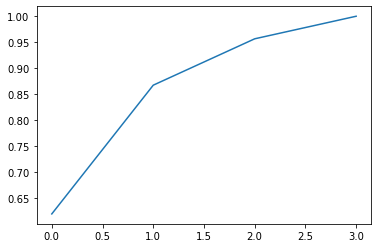

In [19]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [20]:
#From this graph,
#We can understand that less than 65% of the data can be explained by one component,
#                       less than 90% of the data can be explained by two components,
#                       more than 95% of the data can be explained by three components,
#                                100% of the data can be explained by four components.

Thanks to https://github.com/mvahit/DSMLBC